In [12]:
#Cell_1.
import openai
import re
import os
from openai import OpenAI

oai = OpenAI(
    api_key = 'xxxx',
    base_url = "https://api.openai.iniad.org/api/v1"
)

In [13]:
#Cell_2.
with open('world_country_population.csv', 'r', encoding='utf-8') as file:
       file_content = file.read()

In [14]:
#Cell_3.
sysmsg ="あなたはデータサイエンティストです。"

messages=[
       {"role": "system", "content": "いまアップロードしたデータ'world_country_population.csv'について解説してください。"},
       {"role": "user", "content": file_content}
]

resp = oai.chat.completions.create(
    model='gpt-4o-mini',
    messages=messages,
)

print(resp.choices[0].message.content)

CSVファイルは、各国および地域の人口に関する時系列データを含んでいます。このデータは世界銀行の「World Development Indicators」から取得されたもので、以下の主要な情報が含まれています。

### 主要な構成要素

1. **データソースと更新日**:
   - `Data Source`：情報は「World Development Indicators」からのものです。
   - `Last Updated Date`：データが最後に更新された日付（2021年2月17日）。

2. **国名、国コード**:
   - 各国の名前（例：Aruba、Afghanistanなど）と、ISO国コード（例：ABW、AFGなど）が含まれています。

3. **指標名、指標コード**:
   - このファイルは「Population, total」（総人口）に関するデータを示しており、指標コードは「SP.POP.TOTL」です。

4. **年代別の人口データ**:
   - 1960年から2020年までの各年の人口データが含まれています。各年ごとにその年の人口が数値として記されています。

### データのフォーマット

- 各行は特定の国に関するデータを表し、列は次の情報を持ちます：国名、国コード、指標名、指標コード、および1950年から2020年までの人口数値。

### 例

- 例として、アフガニスタン（国名：Afghanistan, 国コード：AFG）についてのデータは次の通りです：
  - 1960年：8996973人
  - 1970年：11173642人
  - 2020年：38041754人

このデータセットは、各国および地域の人口の推移を理解するためのもので、社会学、経済学、政策立案など多くの分野で利用されます。たとえば、人口の増加に伴う資源の需要や、経済成長の影響を分析するための重要なデータとなります。


In [15]:
#Cell_4.
messages.append({"role": "assistant", "content": resp.choices[0].message.content})

# Append a new user message asking for more elaboration
messages=[
       {"role": "system", "content": "有難うございます。そうしましたら、このworld_country_population.csvから2019年時点の中国、インド、インドネシアの人口を取得して、世界地図上に色付けしてください。"},
       {"role": "user", "content": file_content}
]

resp = oai.chat.completions.create(
    model='gpt-4o-mini',
    messages=messages,
)

print(resp.choices[0].message.content)

まずは、与えられた`world_country_population.csv`データセットから2019年の中国、インド、インドネシアの人口を取得します。次に、これらの人口を使って世界地図に色付けを行います。

以下はPythonを用いた例です。これには`pandas` と `matplotlib`ライブラリを使用します。

```python
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

# CSVファイルを読み込み
data = pd.read_csv('world_country_population.csv')

# 2019年の中国、インド、インドネシアの人口を取得
population_data = data[data['Country Name'].isin(['China', 'India', 'Indonesia'])]
population_data = population_data[['Country Name', '2019']].set_index('Country Name')

# 地図データの読み込み
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# 各国の人口データをマージ
world = world.merge(population_data, left_on='name', right_index=True, how='left')

# マップの作成
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.boundary.plot(ax=ax, linewidth=1)
world.plot(column='2019', ax=ax, legend=True,
           legend_kwds={'label': "Population by Country (2019)",
                        'orientation': "horizontal"},
           missing_kwds={"color": "lightgre

In [ ]:
#実際にやってみましょう。

In [16]:
#Cell_5.
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

# CSVファイルを読み込み
data = pd.read_csv('world_country_population.csv')

# 2019年の中国、インド、インドネシアの人口を取得
population_data = data[data['Country Name'].isin(['China', 'India', 'Indonesia'])]
population_data = population_data[['Country Name', '2019']].set_index('Country Name')

# 地図データの読み込み
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# 各国の人口データをマージ
world = world.merge(population_data, left_on='name', right_index=True, how='left')

# マップの作成
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.boundary.plot(ax=ax, linewidth=1)
world.plot(column='2019', ax=ax, legend=True,
           legend_kwds={'label': "Population by Country (2019)",
                        'orientation': "horizontal"},
           missing_kwds={"color": "lightgrey", "label": "No data"})

# ラベルの設定
plt.title("World Population (2019) - China, India, Indonesia highlighted")
plt.show()

ParserError: Error tokenizing data. C error: Expected 3 fields in line 5, saw 66


In [17]:
#Cell_6.
messages.append({"role": "assistant", "content": resp.choices[0].message.content})

# Append a new user message asking for more elaboration
messages=[
       {"role": "system", "content": "有難うございます。申し訳ありませんが、ご提案の方法ですと以下のエラーがでました。 Error tokenizing data. C error: Expected 3 fields in line 5, saw 66"},
       {"role": "user", "content": file_content}
]

resp = oai.chat.completions.create(
    model='gpt-4o-mini',
    messages=messages,
)

print(resp.choices[0].message.content)

このデータを読み込む際に「Error tokenizing data. C error: Expected 3 fields in line 5, saw 66」というエラーが発生するのは、行数や列の設定といった構造的な不一致が原因である場合があります。

以下の手順で適切な形式に修正してから、CSVファイルを読み込むことができるか試してみてください。

1. **ヘッダー行の確認**: 最初の数行が正しいヘッダー行であるか確認してください。特に、最初の行を含めた全ての行がデリミタ（この場合、カンマ）で正しく区切られているか確認する必要があります。

2. **空白行や不正な行の削除**: 全ての行が正しいか確認し、データの途中に空白行や不正なフォーマットの行がないかを見つけて削除してください。

3. **読み込みデリミタの設定**: Pythonの pandas ライブラリを使用している場合、 `read_csv` メソッドを使い、`delimiter`や`header`引数を適切に設定します。

4. **エスケープ処理**: その他問題が解決しない場合は、特にデリミタが使われている場所でのエスケープ処理を考慮する必要があります。ダブルクオートで囲まれたデータを正しく処理できているか確認してください。

以下はPythonを使用した読み込みの基本的な例です。

```python
import pandas as pd

# CSVファイルのパスを指定し、読み込む
file_path = 'yourfile.csv'
df = pd.read_csv(file_path, error_bad_lines=False)

# データを表示して確認
print(df.head())
```

このエラーメッセージにより、特定の行（この場合はライン5）でフィールド数の不一致があることが示唆されていますので、その行を特に注意深く確認すると良いでしょう。データがきちんとカンマで区切られているか、余分なカンマや不完全なデータがないかを確認してください。


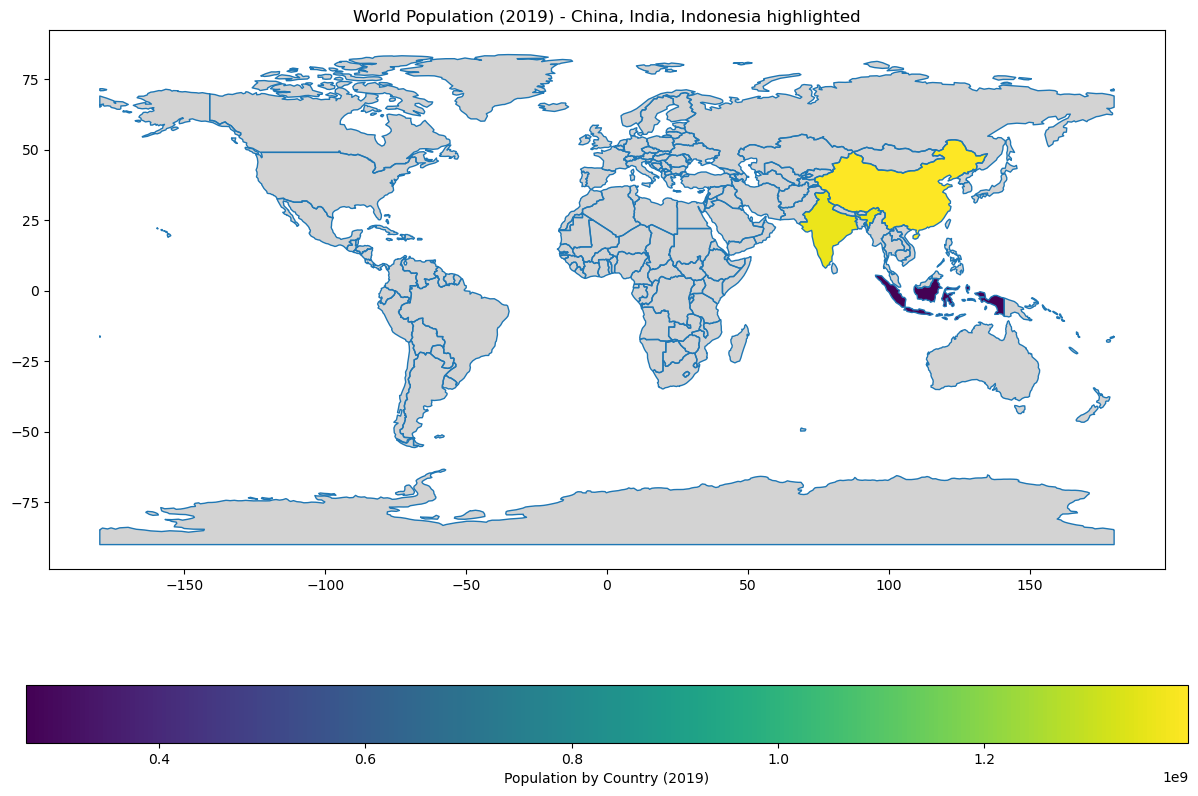

In [18]:
#Cell_7.
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# CSVファイルを読み込み
data = pd.read_csv("world_country_population.csv",sep=",",skiprows=4,header=0)

# 2019年の中国、インド、インドネシアの人口を取得
population_data = data[data['Country Name'].isin(['China', 'India', 'Indonesia'])]
population_data = population_data[['Country Name', '2019']].set_index('Country Name')

# 地図データの読み込み
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# 各国の人口データをマージ
world = world.merge(population_data, left_on='name', right_index=True, how='left')

# マップの作成
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.boundary.plot(ax=ax, linewidth=1)
world.plot(column='2019', ax=ax, legend=True,
           legend_kwds={'label': "Population by Country (2019)",
                        'orientation': "horizontal"},
           missing_kwds={"color": "lightgrey", "label": "No data"})

# ラベルの設定
plt.title("World Population (2019) - China, India, Indonesia highlighted")
plt.show()


In [19]:
#Cell_6.
messages.append({"role": "assistant", "content": resp.choices[0].message.content})

# Append a new user message asking for more elaboration
messages=[
       {"role": "system", "content": "有難うございます!skiprows=4としたらできました！"},
       {"role": "user", "content": file_content}
]

resp = oai.chat.completions.create(
    model='gpt-4o-mini',
    messages=messages,
)

print(resp.choices[0].message.content)

データを読み込む際の `skiprows=4` の設定により、適切にデータフレームを作成できたことをお聞きし、嬉しく思います。もし他に質問やデータ処理に関するリクエストがあればお気軽にどうぞ！
